In [2]:
import requests
import json
import pandas as pd

from collections import Counter
import numpy as np
import plotly.express as px
import plotly as p
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
def api_func(year):
    api_URL= f"https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/migr_asydcfsta?format=JSON&time={year}&unit=PER&citizen=LI&citizen=UK_OCT&citizen=BA&citizen=ME&citizen=MD&citizen=MK&citizen=GE&citizen=AL&citizen=RS&citizen=TR&citizen=UA&citizen=XK&citizen=AD&citizen=BY&citizen=VA&citizen=MC&citizen=RU&citizen=SM&citizen=AO&citizen=CM&citizen=CF&citizen=TD&citizen=CG&citizen=CD&citizen=GQ&citizen=GA&citizen=ST&citizen=BI&citizen=KM&citizen=DJ&citizen=ER&citizen=ET&citizen=KE&citizen=MG&citizen=MW&citizen=MU&citizen=MZ&citizen=RW&citizen=SC&citizen=SO&citizen=UG&citizen=TZ&citizen=ZM&citizen=ZW&citizen=DZ&citizen=EG&citizen=LY&citizen=MA&citizen=SS&citizen=SD&citizen=TN&citizen=EH&citizen=BW&citizen=LS&citizen=NA&citizen=ZA&citizen=SZ&citizen=BJ&citizen=BF&citizen=CV&citizen=CI&citizen=GM&citizen=GH&citizen=GN&citizen=GW&citizen=LR&citizen=ML&citizen=MR&citizen=NE&citizen=NG&citizen=SN&citizen=SL&citizen=TG&citizen=AG&citizen=BS&citizen=BB&citizen=CU&citizen=DM&citizen=DO&citizen=GD&citizen=HT&citizen=JM&citizen=KN&citizen=LC&citizen=VC&citizen=TT&citizen=BZ&citizen=CR&citizen=SV&citizen=GT&citizen=HN&citizen=MX&citizen=NI&citizen=PA&citizen=AR&citizen=BO&citizen=BR&citizen=CL&citizen=CO&citizen=EC&citizen=GY&citizen=PY&citizen=PE&citizen=SR&citizen=UY&citizen=VE&citizen=KZ&citizen=KG&citizen=TJ&citizen=TM&citizen=UZ&citizen=CN&citizen=JP&citizen=MN&citizen=KP&citizen=KR&citizen=TW&citizen=AF&citizen=BD&citizen=BT&citizen=IN&citizen=IR&citizen=MV&citizen=NP&citizen=PK&citizen=LK&citizen=BN&citizen=KH&citizen=ID&citizen=LA&citizen=MY&citizen=MM&citizen=PH&citizen=SG&citizen=TH&citizen=TL&citizen=VN&citizen=AM&citizen=AZ&citizen=BH&citizen=IQ&citizen=IL&citizen=JO&citizen=KW&citizen=LB&citizen=PS&citizen=OM&citizen=QA&citizen=SA&citizen=SY&citizen=AE&citizen=YE&citizen=AU&citizen=NZ&citizen=FJ&citizen=PG&citizen=SB&citizen=VU&citizen=KI&citizen=MH&citizen=FM&citizen=NR&citizen=PW&citizen=CK&citizen=WS&citizen=TO&citizen=TV&citizen=RNC&citizen=STLS&citizen=TOTAL&citizen=UNK&sex=T&sex=M&sex=F&sex=UNK&age=TOTAL&age=Y_LT14&age=Y14-17&age=Y_LT18&age=Y18-34&age=Y35-64&age=Y_GE65&age=UNK&decision=TOTAL&decision=TOTAL_POS&decision=REJECTED&lang=en"
    response = requests.get(api_URL)
    data = response.json()

    dimensions = data['dimension']
    values = data['value']


    rows = []


    dim_names = list(dimensions.keys())


    for index, value in values.items():
        row = {}
        

        idx = int(index)
        

        temp_idx = idx
        for dim_name in reversed(dim_names):
            dim_size = len(dimensions[dim_name]['category']['index'])
            dim_idx = temp_idx % dim_size
            temp_idx = temp_idx // dim_size
            
    
            dim_keys = list(dimensions[dim_name]['category']['index'].keys())
            category_key = dim_keys[dim_idx]
            
        
            if 'label' in dimensions[dim_name]['category']:
                row[dim_name] = dimensions[dim_name]['category']['label'].get(category_key, category_key)
            else:
                row[dim_name] = category_key
        
    
        row['value'] = value
        rows.append(row)


    df = pd.DataFrame(rows)
    asylum_drop = df.drop(["unit","freq"], axis =1 )
    asylum_drop = asylum_drop[asylum_drop["value"] != 0]
    asylum_drop = asylum_drop[(asylum_drop["age"] != "Total") & (asylum_drop["sex"] != "Total") & (asylum_drop["decision"] != "Total") & (asylum_drop["geo"] != "European Union - 27 countries (from 2020)")]
    return asylum_drop

In [5]:
y2023_df = api_func("2023")
y2024_df = api_func("2024")
y2022_df = api_func("2022")
y2021_df = api_func("2021")
combined_df = pd.concat([y2021_df, y2022_df, y2023_df, y2024_df],ignore_index=True)
combined_df.head()

,time,geo,decision,age,sex,citizen,value
0,2021,Belgium,Rejected,From 14 to 17 years,Females,Afghanistan,5
1,2021,Germany,Rejected,From 14 to 17 years,Females,Afghanistan,40
2,2021,Greece,Rejected,From 14 to 17 years,Females,Afghanistan,70
3,2021,France,Rejected,From 14 to 17 years,Females,Afghanistan,15
4,2021,Croatia,Rejected,From 14 to 17 years,Females,Afghanistan,5


In [6]:
combined_df_drop = combined_df.drop(["time"], axis =1 )
display(combined_df_drop)

,geo,decision,age,sex,citizen,value
0,Belgium,Rejected,From 14 to 17 years,Females,Afghanistan,5
1,Germany,Rejected,From 14 to 17 years,Females,Afghanistan,40
2,Greece,Rejected,From 14 to 17 years,Females,Afghanistan,70
3,France,Rejected,From 14 to 17 years,Females,Afghanistan,15
4,Croatia,Rejected,From 14 to 17 years,Females,Afghanistan,5
...,...,...,...,...,...,...
42239,Ireland,Total positive decisions,From 35 to 64 years,Males,Zimbabwe,25
42240,Germany,Rejected,Less than 14 years,Males,Zimbabwe,20
42241,Ireland,Total positive decisions,Less than 14 years,Males,Zimbabwe,20
42242,Germany,Rejected,Less than 18 years,Males,Zimbabwe,25


In [7]:
# split into 2 dfs and get rid of decision column and rename the value one for accepted and rejected respectively 
accepted = combined_df_drop[combined_df_drop["decision"] == "Total positive decisions"]
rejected = combined_df_drop[combined_df_drop["decision"] == "Rejected"]
accepted = accepted.rename(columns={"value": "accepted"})
rejected = rejected.rename(columns={"value": "rejected"})
accepted = accepted.drop(["decision"], axis =1)
rejected = rejected.drop(["decision"], axis =1)
display(accepted)
display(rejected)

,geo,age,sex,citizen,accepted
8,Austria,From 14 to 17 years,Females,Afghanistan,45
9,Belgium,From 14 to 17 years,Females,Afghanistan,20
10,Switzerland,From 14 to 17 years,Females,Afghanistan,45
11,Czechia,From 14 to 17 years,Females,Afghanistan,5
12,Germany,From 14 to 17 years,Females,Afghanistan,115
...,...,...,...,...,...
42234,Ireland,From 14 to 17 years,Males,Zimbabwe,10
42237,Ireland,From 18 to 34 years,Males,Zimbabwe,25
42239,Ireland,From 35 to 64 years,Males,Zimbabwe,25
42241,Ireland,Less than 14 years,Males,Zimbabwe,20


,geo,age,sex,citizen,rejected
0,Belgium,From 14 to 17 years,Females,Afghanistan,5
1,Germany,From 14 to 17 years,Females,Afghanistan,40
2,Greece,From 14 to 17 years,Females,Afghanistan,70
3,France,From 14 to 17 years,Females,Afghanistan,15
4,Croatia,From 14 to 17 years,Females,Afghanistan,5
...,...,...,...,...,...
42235,Cyprus,From 18 to 34 years,Males,Zimbabwe,5
42236,Germany,From 18 to 34 years,Males,Zimbabwe,10
42238,Germany,From 35 to 64 years,Males,Zimbabwe,10
42240,Germany,Less than 14 years,Males,Zimbabwe,20


In [8]:
accepted_grouped = accepted.groupby(["geo", "age", "sex", "citizen"], as_index=False).sum()
rejected_grouped = rejected.groupby(["geo", "age", "sex", "citizen"], as_index=False).sum()
merged = pd.merge(
    accepted_grouped,
    rejected_grouped,
    on=["geo", "age", "sex", "citizen"],
    how="outer"
).fillna(0)
merged["acceptance_rate"] = merged["accepted"]/(merged["accepted"]+ merged["rejected"])
display(merged)

,geo,age,sex,citizen,accepted,rejected,acceptance_rate
0,Austria,65 years or over,Females,Afghanistan,25.0,0.0,1.000000
1,Austria,65 years or over,Females,Georgia,0.0,5.0,0.000000
2,Austria,65 years or over,Females,Iran,10.0,5.0,0.666667
3,Austria,65 years or over,Females,Russia,15.0,30.0,0.333333
4,Austria,65 years or over,Females,Syria,30.0,0.0,1.000000
...,...,...,...,...,...,...,...
10044,Switzerland,Less than 18 years,Males,Türkiye,1725.0,620.0,0.735608
10045,Switzerland,Less than 18 years,Males,Ukraine,5.0,5.0,0.500000
10046,Switzerland,Less than 18 years,Males,Unknown,50.0,30.0,0.625000
10047,Switzerland,Less than 18 years,Males,Venezuela,5.0,0.0,1.000000


In [9]:
merged = merged.drop(["accepted"], axis = 1 )
merged = merged.drop(["rejected"], axis = 1)
display(merged )

,geo,age,sex,citizen,acceptance_rate
0,Austria,65 years or over,Females,Afghanistan,1.000000
1,Austria,65 years or over,Females,Georgia,0.000000
2,Austria,65 years or over,Females,Iran,0.666667
3,Austria,65 years or over,Females,Russia,0.333333
4,Austria,65 years or over,Females,Syria,1.000000
...,...,...,...,...,...
10044,Switzerland,Less than 18 years,Males,Türkiye,0.735608
10045,Switzerland,Less than 18 years,Males,Ukraine,0.500000
10046,Switzerland,Less than 18 years,Males,Unknown,0.625000
10047,Switzerland,Less than 18 years,Males,Venezuela,1.000000


In [10]:
categorical_cols = ["geo", "age", "sex", "citizen"]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(merged[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))
display(one_hot_df)
print(one_hot_df.columns.tolist())


,geo_Austria,geo_Belgium,geo_Bulgaria,geo_Croatia,geo_Cyprus,geo_Czechia,geo_Denmark,geo_Estonia,geo_Finland,geo_France,...,citizen_Uganda,citizen_Ukraine,citizen_Unknown,citizen_Uruguay,citizen_Uzbekistan,citizen_Venezuela,citizen_Viet Nam,citizen_Western Sahara,citizen_Yemen,citizen_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


['geo_Austria', 'geo_Belgium', 'geo_Bulgaria', 'geo_Croatia', 'geo_Cyprus', 'geo_Czechia', 'geo_Denmark', 'geo_Estonia', 'geo_Finland', 'geo_France', 'geo_Germany', 'geo_Greece', 'geo_Hungary', 'geo_Iceland', 'geo_Ireland', 'geo_Italy', 'geo_Latvia', 'geo_Liechtenstein', 'geo_Lithuania', 'geo_Luxembourg', 'geo_Malta', 'geo_Montenegro', 'geo_Netherlands', 'geo_Norway', 'geo_Poland', 'geo_Portugal', 'geo_Romania', 'geo_Slovakia', 'geo_Slovenia', 'geo_Spain', 'geo_Sweden', 'geo_Switzerland', 'age_65 years or over', 'age_From 14 to 17 years', 'age_From 18 to 34 years', 'age_From 35 to 64 years', 'age_Less than 14 years', 'age_Less than 18 years', 'age_Unknown', 'sex_Females', 'sex_Males', 'sex_Unknown', 'citizen_Afghanistan', 'citizen_Albania', 'citizen_Algeria', 'citizen_Angola', 'citizen_Argentina', 'citizen_Armenia', 'citizen_Azerbaijan', 'citizen_Bahrain', 'citizen_Bangladesh', 'citizen_Belarus', 'citizen_Benin', 'citizen_Bhutan', 'citizen_Bolivia', 'citizen_Bosnia and Herzegovina', 'c

In [11]:
merged.to_csv('long_data_accrate.csv', index=False)
one_hot_df.to_csv('wide_data_X.csv', index=False)

In [12]:
# read in the data from .csv, so you never have to call the API again
merged = pd.read_csv('long_data_accrate.csv')
one_hot_df= pd.read_csv('wide_data_X.csv')

In [13]:
X = np.array(one_hot_df)
X = np.column_stack([np.ones(X.shape[0]), X])
y = merged['acceptance_rate'].to_numpy()
w = np.random.randn(176,)


def logistic_regression(X, y, w, alpha = 1, max_iter = None):
    """
    A function that runs logistic regrtession for some maximum number of iterations

    Args:
        X (array): an array of all the predictors where the rows are the observations (includes bias term)
        y (array): an array of all response values (-1 or 1)
        w (array): the initial weight vector
        alpha (double): a scalar that serves as the learning rate (default = 1)
        max_iter (int): an integer specifying the maximum number of iteraions (default = None)

    Returns:
        w (array): the final weight vector
    """
    runalg = True
    i = 0
    iter = 0
    
    while runalg:

        x = X[i, :]
        yhat = 1/(1 + np.exp(-np.dot(x, w)))

        w = w - alpha*(yhat - y[i])*x
        i += 1

        if i == len(y):
            i = 0
            iter += 1

        if max_iter != None:
            if iter == max_iter:
                runalg = False
                print(f"Algorithm reached max_iter, final w = {w}")
                print(f"Total number of iterations = {iter}")
                break
                    
    return w

run = logistic_regression(X, y, w, alpha = .007, max_iter = 1000)

Algorithm reached max_iter, final w = [-1.64188119e-01  5.04239564e-01 -8.26178899e-01  1.21046383e-01
 -2.27560261e+00 -8.40493630e-01 -7.10212248e-01 -1.51877151e+00
  9.56154585e-01  2.53279537e-01 -5.44470779e-01 -8.86798513e-01
 -5.72330956e-03  9.88328306e-01 -1.09081397e+00  3.42522291e+00
  1.81450010e+00 -6.47625064e-01 -8.23969956e-02 -1.09368202e+00
 -7.99456792e-01 -2.08517375e+00  2.28724871e+00  2.01600529e-01
 -3.17082103e-01  4.58141783e-02 -6.42644736e-02 -4.35652336e-01
  4.63212262e-01  9.35334752e-01  3.76542135e-01 -1.89514678e+00
  8.18300017e-01 -1.34367368e-01  1.73440956e-01 -7.31218460e-01
 -7.66157196e-01  2.47533284e-01  2.49553991e-01  5.92746053e-01
 -1.99967780e-01 -7.64447700e-01  6.45150054e-01  3.00738959e+00
 -1.86580545e+00 -9.14916396e-01 -6.51248267e-01 -1.38363682e+00
 -1.70019622e+00 -7.25524712e-01  3.47502915e+00 -6.96950253e-01
  1.41698360e+00 -8.60596920e-01  2.10508928e+00 -1.58923611e+00
 -7.86006084e-01  3.61544027e-01 -1.52473591e+00  1.

In [14]:
def predict_logistic(x, w, pred0 = True):
    if pred0 == True:
        yhat = 1/(1 + np.exp(np.dot(x, w)))
    else:
        yhat = np.exp(np.dot(x, w))/(1 + np.exp(np.dot(x, w)))
    return yhat

yhati = np.apply_along_axis(predict_logistic, 1, X, pred0 = False, w=run)
print(yhati)
print(y)

[0.95316271 0.1057701  0.80759489 ... 0.78325504 0.66890605 0.97605035]
[1.         0.         0.66666667 ... 0.625      1.         1.        ]


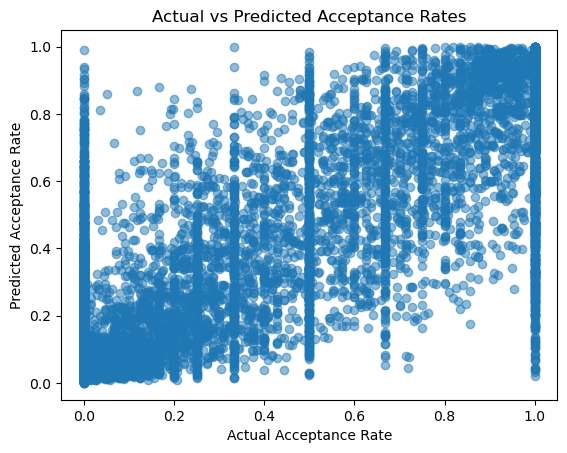

In [16]:
#adding predicted to the data frame
plt.scatter(y, yhati, alpha=0.5)
plt.title('Actual vs Predicted Acceptance Rates')
plt.xlabel('Actual Acceptance Rate')
plt.ylabel('Predicted Acceptance Rate')
plt.show()

In [17]:
np.corrcoef(y, yhati)**2

array([[1.        , 0.64503057],
       [0.64503057, 1.        ]])

In [18]:
b = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
res = y - np.matmul(X, b)

In [19]:
x = merged["acceptance_rate"]
x

0        1.000000
1        0.000000
2        0.666667
3        0.333333
4        1.000000
           ...   
10044    0.735608
10045    0.500000
10046    0.625000
10047    1.000000
10048    1.000000
Name: acceptance_rate, Length: 10049, dtype: float64

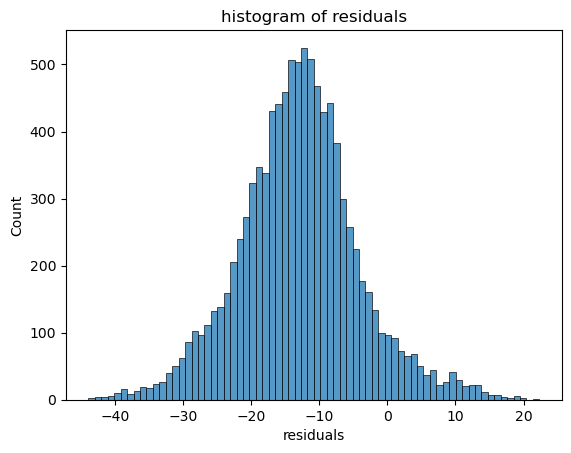

In [20]:
#histogram of reisduals
sns.histplot(res, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()
#Normal around -15

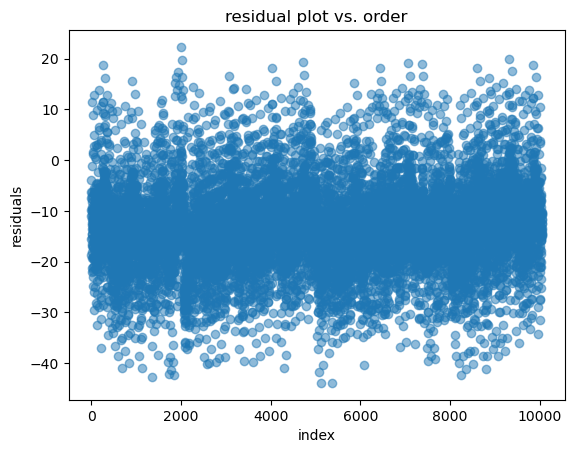

In [21]:
#Assessing no autocorrelation
plt.scatter(range(len(x)), res, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

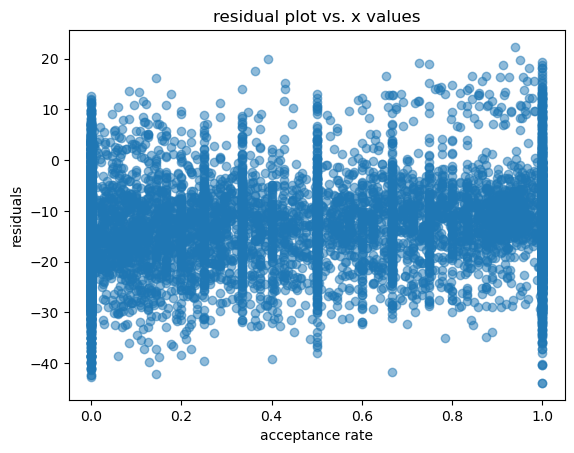

In [22]:
#Assessing linerarity/ homoscedacity
plt.scatter(x, res, alpha = .5)
plt.xlabel("acceptance rate")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()